## Логистическая регрессия

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm # pip install tqdm – замер времени выполнения итераций цикла
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Визуальный анализ данных

**Считаем [данные](https://archive.ics.uci.edu/ml/datasets/Adult) по жителям США из репозитория UCI. По ссылке можно почитать про данные и смысл признаков.**

In [2]:
adult = pd.read_csv('adult.data', skipinitialspace=True)
adult.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

In [3]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**Поисследуйте данные – постройте графики с помощью seaborn, посмотрите, как целевой признак salary зависит от других (Можно использовать методы distplot, pairplot, countplot, boxplot из seaborn. Эта часть задания строго не формулируется)**

In [4]:
numeric = []
non_num = []

for col in adult.columns:
    if adult.dtypes[col] == 'int64':
        numeric.append(col)
    else:
        non_num.append(col)

<AxesSubplot:>

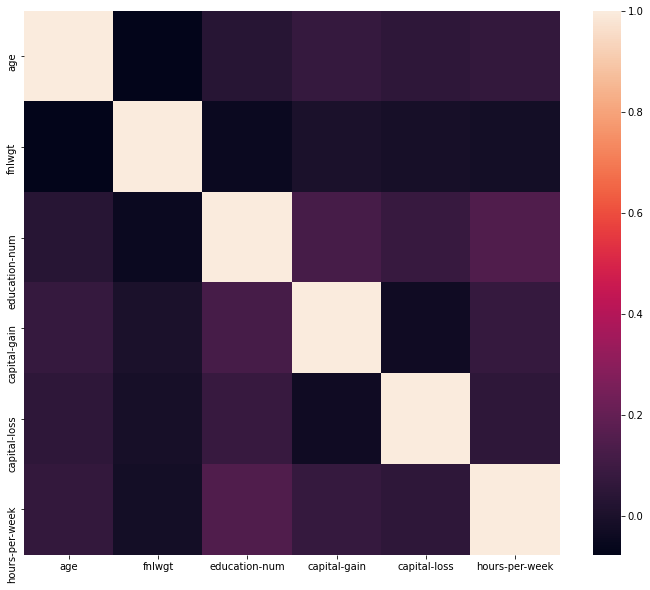

In [5]:
plt.figure(figsize=(12, 10))

sns.heatmap(adult[numeric].corr())

<AxesSubplot:>

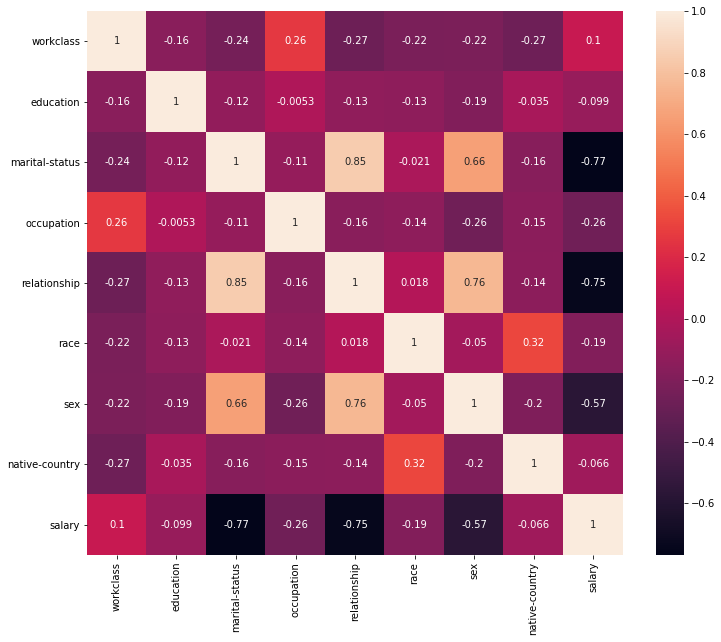

In [6]:
plt.figure(figsize=(12, 10))

corr = adult[non_num].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

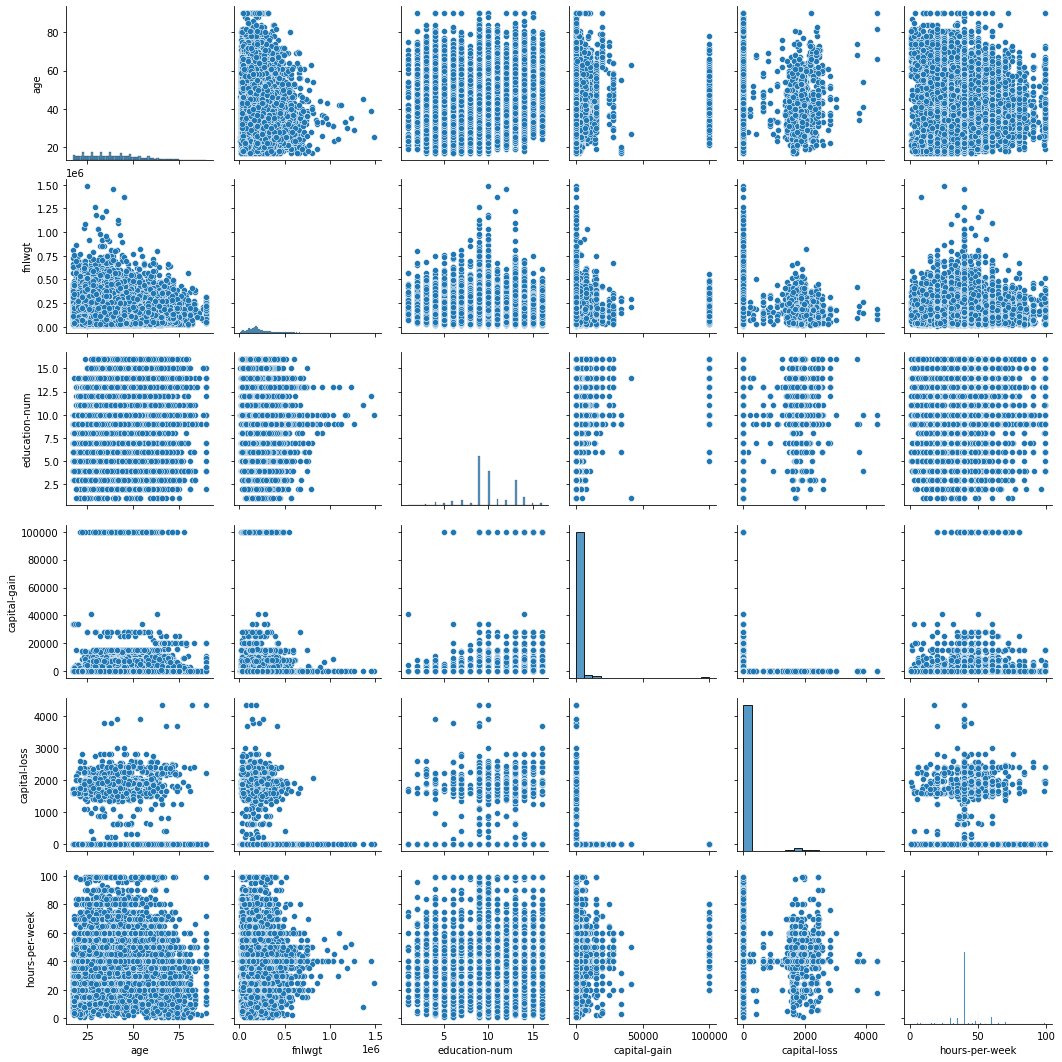

In [7]:
sns.pairplot(adult)

## Часть 2. Подготовка данных

**Выделим целевой признак *y*, равный 1, если зарплата > 50K ($50 тыс. в год) и 0 – иначе.**

In [8]:
adult.salary.unique()

array(['<=50K', '>50K'], dtype=object)

In [9]:
def salary_category(salary):
    if salary == '>50K':
        return 1
    else:
        return 0

In [10]:
y = adult['salary'].apply(salary_category)
y.unique()

array([0, 1], dtype=int64)

**Составьте DataFrame *X* из количественных признаков – *age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week*.**

In [11]:
X = adult[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

In [12]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


**Разбейте *X* и *y* на обучающую и проверочную части в отношении 7:3 с помощью метода *train_test_split* из *sklearn.model_selection*. Поскольку разбиение случайно, зафиксируйте параметр *random_state=17* – для воспроизводимости результатов.**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=17)

## Часть 3. Обучение моделей с параметрами по умолчанию

**Обучите логистическую регрессию с настройками по умолчанию (единственное, укажите *random_state=17*) на тренировочной части выборки *(X_train, y_train)*, сделайте прогнозы для проверочной части *(X_test, y_test)*, посчитайте долю правильных ответов (*accuracy_score* из *sklearn.metrics* или метод *score* у обученной модели) на обеих выборках X_train, X_test.**

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
lr = LogisticRegression(random_state=17).fit(X_train, y_train)

print(accuracy_score(y_train, lr.predict(X_train)))
print(accuracy_score(y_test, lr.predict(X_test)))

0.796990171990172
0.7927927927927928


**Линейные методы классификации и регрессии чувствительны к диапазону изменения значений признаков и работают лучше, если отмасштабировать признаки – для каждого признака вычесть среднее значение признака и поделить на стандартное отклонение. Это делает например класс *StandartScaler* из *sklearn.preprocessing*.**

In [16]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Теперь обучитесь и посчитайте accuracy для выборок X_train_scaled, X_test_scaled.**

In [17]:
lr_scaled = LogisticRegression(random_state=17).fit(X_train_scaled, y_train)

print(accuracy_score(y_train, lr_scaled.predict(X_train_scaled)))
print(accuracy_score(y_test, lr_scaled.predict(X_test_scaled)))

0.8168216918216918
0.8126535626535627


**<font color='red'>Вопрос 1.</font> Какова доля правильных ответов логистической регрессии на выборке *(X_test_scaled, y_test)*?** 

Доля правильных ответов: ~0.813

**Добавьте в данные X категориальные признаки education, occupation, relationship, race, sex. Преобразуйте их в числовые с помощью OneHotEncoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html. Примените StandartScaler для вещественных признаков. Оберните все в пайплайн.**

In [18]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

def get_categ_cols(df):
    return df[['education', 'occupation', 'relationship', 'race', 'sex']]

def get_num_cols(df):
    return df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

vec = make_union(*[
    make_pipeline(FunctionTransformer(get_categ_cols, validate=False), OneHotEncoder()),
    make_pipeline(FunctionTransformer(get_num_cols, validate=False), StandardScaler())
])

In [19]:
X_scaled_categ = vec.fit_transform(adult)

**Повторите процедуру train_test_split с random_state=17 для преобразованного датасета X_scaled_categ.
Обучите логистическую регрессию еще раз**

In [20]:
X_train_scaled_categ, X_test_scaled_categ, y_train, y_test = train_test_split(X_scaled_categ, y, test_size=0.3, train_size=0.7, random_state=17)

lr_scaled_categ = LogisticRegression(random_state=17).fit(X_train_scaled_categ, y_train)

print(accuracy_score(y_train, lr_scaled_categ.predict(X_train_scaled_categ)))
print(accuracy_score(y_test, lr_scaled_categ.predict(X_test_scaled_categ)))

0.849991224991225
0.8498157248157249


**<font color='red'>Вопрос 2.</font> Какова доля правильных ответов логистической регрессии на выборке *(X_test_scaled_categ, y_test)*?**

Доля правильных ответов: ~0.85

## Часть 4. Балансировка классов. 

зачем

когда мы обучаемся, наши классы могут быть представлены разным числом наблюдений, а это может влиять на качество обучения

для фикса этого используется балансировка классов

мораль: "делайте стратификацию"

также можно нарочно переобучить модель на определённой фиче, размножив какую-либо специфичную запись. например, кредит могут не вернуть люди с одной улицы, но при обучении такой человек встречался всего один раз

Обучите логистическую регрессию используя веса (параметр class_weight='balanced' регрессии) на выборке X_train_scaled_categ. Получите метрику ROC AUC на тестовой выборке X_test_scaled_categ.

In [21]:
from sklearn.metrics import roc_auc_score

In [22]:
lr_weighted = LogisticRegression(random_state=17, class_weight='balanced').fit(X_train_scaled_categ, y_train)

roc_auc_score(y_test, lr_weighted.predict(X_test_scaled_categ))

0.8210498678926761

Подберите гиперпараметр С (переберите 50 значений от 0.001 до 1, c_values = np.linspace(1e-3, 1, 50)) с помощью метода LogisticRegressionCV на выборке X_train_scaled_categ. Посмотрите как изменилась метрика ROC AUC на тестовой выборке.

In [23]:
from sklearn.linear_model import LogisticRegressionCV

c_values = np.linspace(1e-3, 1, 50)

lr_cv = LogisticRegressionCV(Cs=c_values).fit(X_train_scaled_categ, y_train)

roc_auc_score(y_test, lr_cv.predict(X_test_scaled_categ))

0.7629342737562894

Как можно видеть, метрика ROC AUC снизилась, что значит, что классификация получилась хуже